In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('insurance_data.csv')
data

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [4]:
data.shape

(27, 2)

In [5]:
x = data.drop('bought_insurance', axis=1)
y = data['bought_insurance']

In [6]:
x

,age
0,22
1,25
2,47
3,52
4,46
5,56
6,55
7,60
8,62
9,61


In [7]:
y

0     0
1     0
2     1
3     0
4     1
5     1
6     0
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    1
15    1
16    1
17    1
18    0
19    0
20    0
21    0
22    1
23    1
24    1
25    1
26    0
Name: bought_insurance, dtype: int64

Text(0, 0.5, 'Bought_insurance or not')

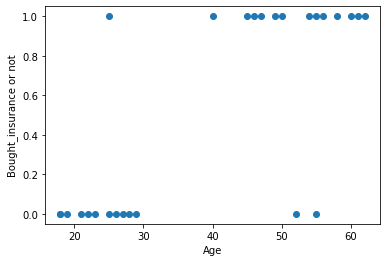

In [8]:
plt.scatter(x, y)
plt.xlabel('Age')
plt.ylabel('Bought_insurance or not')

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,random_state=20)
print(len(x_train))
x_train


20


,age
25,54
23,45
22,40
21,26
5,56
24,50
19,18
14,49
17,58
6,55


In [10]:
print(x_train.shape, x_test.shape)

(20, 1) (7, 1)


In [11]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [22]:
y_pred = model.predict(x_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [23]:
prediction_table = pd.DataFrame({'True y':y_test, 'predicted_y':y_pred})
prediction_table

,True y,predicted_y
13,0,0
4,1,1
1,0,0
10,0,0
26,0,0
12,0,0
18,0,0


In [24]:
model.score(x_train, y_train)

0.85

In [25]:
model.score(x_test, y_test) # accuracy

1.0

In [26]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

In [27]:
accuracy_score(y_test, y_pred)

1.0

In [18]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[6 0]
 [0 1]]


Text(33.0, 0.5, 'Predictions')

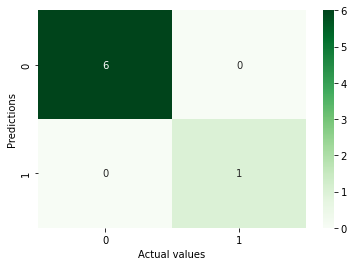

In [37]:
sns.heatmap(cm,cmap='Greens',annot=True)
plt.xlabel('Actual values')
plt.ylabel('Predictions')

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         1

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

